# Time Series Basics

## Imports

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
from pandas.tseries.frequencies import to_offset

## Load Datetime Direct From CSV

In [13]:
df = pd.read_csv('data/temp.csv', parse_dates=['datetime'], index_col='datetime')

In [15]:
df.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [17]:
type(df.iloc[0,0])

numpy.float64

In [18]:
df.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

## Converting Strings to Datetime Objects

In [25]:
df = pd.read_csv('data/temp.csv')

In [26]:
df.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


In [31]:
type(df.datetime[0])

str

In [33]:
pd.to_datetime(df.datetime)

0       2013-01-01 00:00:00
1       2013-01-01 01:00:00
2       2013-01-01 02:00:00
3       2013-01-01 03:00:00
4       2013-01-01 04:00:00
                ...        
35059   2016-12-31 19:00:00
35060   2016-12-31 20:00:00
35061   2016-12-31 21:00:00
35062   2016-12-31 22:00:00
35063   2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: datetime64[ns]

In [35]:
df = df.set_index(pd.to_datetime(df.datetime)).drop("datetime", axis = 1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [38]:
pd.to_datetime("2015-05-20 10:30:20")

Timestamp('2015-05-20 10:30:20')

In [39]:
pd.to_datetime("20150520")

Timestamp('2015-05-20 00:00:00')

In [40]:
pd.to_datetime("2015/05/20")

Timestamp('2015-05-20 00:00:00')

In [41]:
pd.to_datetime("2015 05 20")

Timestamp('2015-05-20 00:00:00')

In [42]:
pd.to_datetime("2015 May 20")

Timestamp('2015-05-20 00:00:00')

In [43]:
pd.to_datetime("May 2015 20")

Timestamp('2015-05-20 00:00:00')

In [44]:
pd.to_datetime("2015 20th may")

Timestamp('2015-05-20 00:00:00')

In [46]:
pd.to_datetime(["2015-05-20", "Feb 20 2015"], format = "mixed") 

DatetimeIndex(['2015-05-20', '2015-02-20'], dtype='datetime64[ns]', freq=None)

In [49]:
pd.to_datetime(["2015-05-20", "Feb 20 2015", "Elephant"], format = "mixed", errors="coerce")

DatetimeIndex(['2015-05-20', '2015-02-20', 'NaT'], dtype='datetime64[ns]', freq=None)

## Initial Analysis and Visualization of Time Series

In [50]:
df.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [51]:
df.tail()

,LA,NY
datetime,,
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8
2016-12-31 22:00:00,12.3,5.7
2016-12-31 23:00:00,11.9,5.5


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [53]:
df.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


In [55]:
df.LA.value_counts()

LA
 16.2    238
 16.7    237
 15.2    234
 18.2    231
 16.6    228
        ... 
 40.7      1
 39.5      1
 37.0      1
 37.6      1
-3.3       1
Name: count, Length: 442, dtype: int64

array([[<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>]],
      dtype=object)

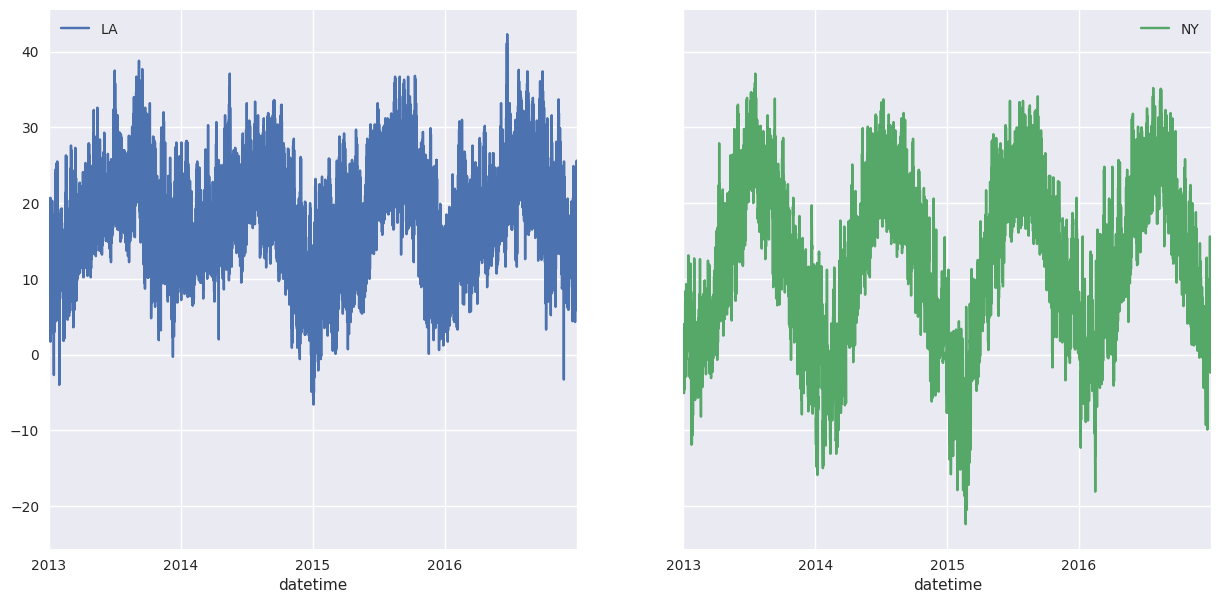

In [103]:
df.plot(figsize=(15,7), subplots=True, layout=(1,2), sharey=True)

## Indexing and Slicing Time Series

In [62]:
df = pd.read_csv("data/temp.csv", parse_dates= ["datetime"], index_col= "datetime")

In [63]:
df.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [66]:
df.loc["2013-01-01 01:00:00"]

LA    10.7
NY    -1.7
Name: 2013-01-01 01:00:00, dtype: float64

In [67]:
df.loc["2015"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [68]:
df.loc["2015-05"]

,LA,NY
datetime,,
2015-05-01 00:00:00,25.5,13.9
2015-05-01 01:00:00,25.7,13.9
2015-05-01 02:00:00,23.8,10.5
2015-05-01 03:00:00,22.0,10.2
2015-05-01 04:00:00,20.1,8.6
...,...,...
2015-05-31 19:00:00,25.4,25.5
2015-05-31 20:00:00,26.0,23.9
2015-05-31 21:00:00,24.9,22.5


In [69]:
df.loc["2015-01-01" : "2015-12-31"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [70]:
df.loc["2015-01-01" : "2015-12-31"].equals(df.loc["2015"])

True

In [71]:
df.loc["2015-05-20":]

,LA,NY
datetime,,
2015-05-20 00:00:00,17.7,19.8
2015-05-20 01:00:00,18.0,19.7
2015-05-20 02:00:00,16.6,19.0
2015-05-20 03:00:00,14.4,19.0
2015-05-20 04:00:00,13.3,19.7
...,...,...
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8


In [72]:
df.loc[:"2015-05-20"]

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
...,...,...
2015-05-20 19:00:00,17.7,18.1
2015-05-20 20:00:00,18.4,17.8
2015-05-20 21:00:00,18.0,17.8


In [73]:
df.loc["20FEBRUARY2015"]

,LA,NY
datetime,,
2015-02-20 00:00:00,16.4,-12.4
2015-02-20 01:00:00,17.5,-12.4
2015-02-20 02:00:00,14.6,-14.5
2015-02-20 03:00:00,13.9,-14.5
2015-02-20 04:00:00,10.3,-14.5
2015-02-20 05:00:00,8.9,-15.9
2015-02-20 06:00:00,9.0,-15.9
2015-02-20 07:00:00,7.1,-15.9
2015-02-20 08:00:00,6.6,-16.8


In [74]:
two_timestamps = pd.to_datetime(["2015-05-20 10:00:00", "2015-05-20 12:00:00"])
two_timestamps

DatetimeIndex(['2015-05-20 10:00:00', '2015-05-20 12:00:00'], dtype='datetime64[ns]', freq=None)

In [75]:
df.loc[two_timestamps]

,LA,NY
2015-05-20 10:00:00,7.8,13.3
2015-05-20 12:00:00,9.7,13.6


## Creating a Datetime Index With pd.date_range()

In [76]:
pd.to_datetime(["2015-05-20", "Feb 20 2015"] , format = "mixed")

DatetimeIndex(['2015-05-20', '2015-02-20'], dtype='datetime64[ns]', freq=None)

In [79]:
# Days with start and end
pd.date_range(start = "2015-07-01", end = "2015-07-31", freq= "D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [80]:
# Number of days from a start point
pd.date_range(start = "2015-07-01", periods = 31, freq = "D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [81]:
# Number of days up to an end point
pd.date_range(end = "2015-07-31", periods = 31, freq = "D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [83]:
# Business days
pd.date_range(start = "2015-07-01", end = "2015-07-31", freq = "B")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-20', '2015-07-21', '2015-07-22',
               '2015-07-23', '2015-07-24', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='B')

In [84]:
# Hours
pd.date_range(start = "2015-07-31", periods = 10, freq = "h")

DatetimeIndex(['2015-07-31 00:00:00', '2015-07-31 01:00:00',
               '2015-07-31 02:00:00', '2015-07-31 03:00:00',
               '2015-07-31 04:00:00', '2015-07-31 05:00:00',
               '2015-07-31 06:00:00', '2015-07-31 07:00:00',
               '2015-07-31 08:00:00', '2015-07-31 09:00:00'],
              dtype='datetime64[ns]', freq='h')

In [85]:
# Weeks
pd.date_range(start = "2015-07-01", periods = 6,  freq = "W")

DatetimeIndex(['2015-07-05', '2015-07-12', '2015-07-19', '2015-07-26',
               '2015-08-02', '2015-08-09'],
              dtype='datetime64[ns]', freq='W-SUN')

In [86]:
# Weeks on a given day
pd.date_range(start = "2015-07-01", periods = 6,  freq = "W-Wed")

DatetimeIndex(['2015-07-01', '2015-07-08', '2015-07-15', '2015-07-22',
               '2015-07-29', '2015-08-05'],
              dtype='datetime64[ns]', freq='W-WED')

In [87]:
# Month ends
pd.date_range(start = "2015-07-14", periods = 6,  freq = "ME")

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [88]:
# Month starts
pd.date_range(start = "2015-07-14", periods = 6,  freq = "MS")

DatetimeIndex(['2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [90]:
# Using pd.offset to set frequency
pd.date_range(start = "2015-07-14", periods = 6,  freq = pd.DateOffset(months = 1))

DatetimeIndex(['2015-07-14', '2015-08-14', '2015-09-14', '2015-10-14',
               '2015-11-14', '2015-12-14'],
              dtype='datetime64[ns]', freq='<DateOffset: months=1>')

In [91]:
# Quarter ends
pd.date_range(start = "2015-07-14", periods = 6,  freq = "QE")

DatetimeIndex(['2015-09-30', '2015-12-31', '2016-03-31', '2016-06-30',
               '2016-09-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='QE-DEC')

In [92]:
# Quarter starts
pd.date_range(start = "2015-07-14", periods = 6,  freq = "QS")

DatetimeIndex(['2015-10-01', '2016-01-01', '2016-04-01', '2016-07-01',
               '2016-10-01', '2017-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [94]:
# Quarter starts from a given month
pd.date_range(start = "2015-07-14", periods = 6,  freq = "QS-MAY")

DatetimeIndex(['2015-08-01', '2015-11-01', '2016-02-01', '2016-05-01',
               '2016-08-01', '2016-11-01'],
              dtype='datetime64[ns]', freq='QS-MAY')

In [95]:
# Year ends
pd.date_range(start = "2015-07-14", periods = 6,  freq = "YE")

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [96]:
# Year starts
pd.date_range(start = "2015-07-14", periods = 6,  freq = "YS")

DatetimeIndex(['2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

In [98]:
# Year starts from a given month
pd.date_range(start = "2015-07-14", periods = 6,  freq = "YS-JUL")

DatetimeIndex(['2016-07-01', '2017-07-01', '2018-07-01', '2019-07-01',
               '2020-07-01', '2021-07-01'],
              dtype='datetime64[ns]', freq='YS-JUL')

In [99]:
pd.date_range(end = "2018-11-24", periods = 10,  freq = pd.DateOffset(years = 1))

DatetimeIndex(['2009-11-24', '2010-11-24', '2011-11-24', '2012-11-24',
               '2013-11-24', '2014-11-24', '2015-11-24', '2016-11-24',
               '2017-11-24', '2018-11-24'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [101]:
# Micing frequency codes
pd.date_range(start = "2015-07-01", periods = 10, freq = "3D8h")

DatetimeIndex(['2015-07-01 00:00:00', '2015-07-04 08:00:00',
               '2015-07-07 16:00:00', '2015-07-11 00:00:00',
               '2015-07-14 08:00:00', '2015-07-17 16:00:00',
               '2015-07-21 00:00:00', '2015-07-24 08:00:00',
               '2015-07-27 16:00:00', '2015-07-31 00:00:00'],
              dtype='datetime64[ns]', freq='80h')

## Downsampling with resample() - similar to groupby()

In [105]:
df.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [107]:
# Creating a resample object
df.resample('D')

In [109]:
# Datetime grouped into days
list(df.resample('D'))

[(Timestamp('2013-01-01 00:00:00'),
                         LA   NY
  datetime                      
  2013-01-01 00:00:00  11.7 -1.1
  2013-01-01 01:00:00  10.7 -1.7
  2013-01-01 02:00:00   9.9 -2.0
  2013-01-01 03:00:00   9.3 -2.1
  2013-01-01 04:00:00   8.8 -2.3
  2013-01-01 05:00:00   8.7 -2.5
  2013-01-01 06:00:00   6.9 -3.2
  2013-01-01 07:00:00   7.8 -3.4
  2013-01-01 08:00:00   6.7 -3.0
  2013-01-01 09:00:00   6.6 -1.8
  2013-01-01 10:00:00   6.1 -1.4
  2013-01-01 11:00:00   5.6 -1.8
  2013-01-01 12:00:00   5.1 -1.7
  2013-01-01 13:00:00   5.2 -1.5
  2013-01-01 14:00:00   4.6 -1.0
  2013-01-01 15:00:00   5.1 -0.0
  2013-01-01 16:00:00   6.2  1.2
  2013-01-01 17:00:00   9.3  2.2
  2013-01-01 18:00:00  11.4  3.3
  2013-01-01 19:00:00  12.0  3.5
  2013-01-01 20:00:00  12.9  3.1
  2013-01-01 21:00:00  13.9  2.4
  2013-01-01 22:00:00  14.1  2.4
  2013-01-01 23:00:00  14.0  2.7),
 (Timestamp('2013-01-02 00:00:00'),
                         LA   NY
  datetime                      
  

In [110]:
list(df.resample("D"))[1][1]

,LA,NY
datetime,,
2013-01-02 00:00:00,13.2,2.6
2013-01-02 01:00:00,11.8,2.7
2013-01-02 02:00:00,10.5,2.9
2013-01-02 03:00:00,9.5,2.9
2013-01-02 04:00:00,8.3,2.9
2013-01-02 05:00:00,8.0,3.5
2013-01-02 06:00:00,7.5,3.7
2013-01-02 07:00:00,7.1,3.5
2013-01-02 08:00:00,6.4,3.7


In [111]:
# First entry of each day
df.resample("D").first()

,LA,NY
datetime,,
2013-01-01,11.7,-1.1
2013-01-02,13.2,2.6
2013-01-03,15.1,0.3
2013-01-04,16.3,-1.2
2013-01-05,18.1,-1.2
...,...,...
2016-12-27,15.1,4.1
2016-12-28,19.9,11.2
2016-12-29,23.3,2.1


In [113]:
# Last entry of each day
df.resample("D").last()

,LA,NY
datetime,,
2013-01-01,14.0,2.7
2013-01-02,15.1,1.2
2013-01-03,16.6,-1.5
2013-01-04,20.0,-1.2
2013-01-05,17.8,2.0
...,...,...
2016-12-27,20.1,12.9
2016-12-28,24.3,2.6
2016-12-29,25.6,4.2


In [115]:
# Aggregating on days
df.resample("D").sum()

,LA,NY
datetime,,
2013-01-01,212.6,-9.7
2013-01-02,222.8,77.0
2013-01-03,247.3,-58.2
2013-01-04,276.3,-49.7
2013-01-05,266.0,19.6
...,...,...
2016-12-27,291.7,253.9
2016-12-28,346.4,96.4
2016-12-29,385.1,31.5


In [116]:
# First entry of every 2 hours
df.resample("2h").first()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 08:00:00,6.7,-3.0
...,...,...
2016-12-31 14:00:00,12.7,-1.3
2016-12-31 16:00:00,12.6,1.1
2016-12-31 18:00:00,13.2,3.4


In [117]:
# Mean temperatures for each week
df.resample("W").mean()

,LA,NY
datetime,,
2013-01-06,10.214583,0.222917
2013-01-13,10.494048,4.245238
2013-01-20,11.119643,3.924405
2013-01-27,15.586905,-4.660714
2013-02-03,11.569643,1.502381
...,...,...
2016-12-04,12.975595,8.024405
2016-12-11,13.738095,1.922619
2016-12-18,13.466667,0.052381


In [118]:
# Mean temperatures for each week starting Wednesday
df.resample("W-Wed").mean()

,LA,NY
datetime,,
2013-01-02,9.070833,1.402083
2013-01-09,11.033333,1.033929
2013-01-16,8.870238,6.001190
2013-01-23,14.678571,1.010714
2013-01-30,12.554762,-4.382738
...,...,...
2016-12-07,13.205357,5.964286
2016-12-14,14.490476,1.228571
2016-12-21,13.209524,-2.248810


In [121]:
# Monthly average temperatures using month start
df.resample("MS").mean()

,LA,NY
datetime,,
2013-01-01,11.596237,1.129570
2013-02-01,12.587202,0.617857
2013-03-01,15.069946,3.719220
2013-04-01,16.487361,10.699306
2013-05-01,19.005780,15.824328
2013-06-01,19.905417,22.225694
2013-07-01,22.093952,26.329704
2013-08-01,21.513172,22.480376
2013-09-01,22.404861,18.291806


In [123]:
# Monthly average temperatures using month end
df.resample("ME").mean()

,LA,NY
datetime,,
2013-01-31,11.596237,1.129570
2013-02-28,12.587202,0.617857
2013-03-31,15.069946,3.719220
2013-04-30,16.487361,10.699306
2013-05-31,19.005780,15.824328
2013-06-30,19.905417,22.225694
2013-07-31,22.093952,26.329704
2013-08-31,21.513172,22.480376
2013-09-30,22.404861,18.291806


In [127]:
df.resample("QE").mean()

,LA,NY
datetime,,
2013-03-31,13.099212,1.862361
2013-06-30,18.472115,16.245101
2013-09-30,21.999638,22.411594
2013-12-31,15.047781,8.084918
2014-03-31,15.508287,-0.570880
2014-06-30,18.891255,16.253938
2014-09-30,22.281295,21.738315
2014-12-31,12.281748,7.855933
2015-03-31,11.869306,-3.340509


In [128]:
df.resample("QE-FEB").mean()

,LA,NY
datetime,,
2013-02-28,12.066525,0.886723
2013-05-31,16.859973,10.074230
2013-08-31,21.184601,23.694384
2013-11-30,18.028755,13.258288
2014-02-28,14.675000,-0.301713
2014-05-31,17.562047,9.645652
2014-08-31,21.691168,22.559284
2014-11-30,16.640522,13.097070
2015-02-28,9.822593,-2.481574


In [129]:
df.resample("YE").mean()

,LA,NY
datetime,,
2013-12-31,17.174229,12.196153
2014-12-31,17.245616,11.370959
2015-12-31,17.191530,11.795194
2016-12-31,18.330305,12.908470


In [130]:
df.resample("YS").mean()

,LA,NY
datetime,,
2013-01-01,17.174229,12.196153
2014-01-01,17.245616,11.370959
2015-01-01,17.191530,11.795194
2016-01-01,18.330305,12.908470


In [149]:
# Converting monthly means to a period index
df.resample("ME").mean().to_period()

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


In [148]:
# Converting weekly means to a period index
df.resample("W").mean().to_period()

,LA,NY
datetime,,
2012-12-31/2013-01-06,10.214583,0.222917
2013-01-07/2013-01-13,10.494048,4.245238
2013-01-14/2013-01-20,11.119643,3.924405
2013-01-21/2013-01-27,15.586905,-4.660714
2013-01-28/2013-02-03,11.569643,1.502381
...,...,...
2016-11-28/2016-12-04,12.975595,8.024405
2016-12-05/2016-12-11,13.738095,1.922619
2016-12-12/2016-12-18,13.466667,0.052381


In [150]:
# Converting quarterly means to a period index
df.resample("QE").mean().to_period()

,LA,NY
datetime,,
2013Q1,13.099212,1.862361
2013Q2,18.472115,16.245101
2013Q3,21.999638,22.411594
2013Q4,15.047781,8.084918
2014Q1,15.508287,-0.570880
2014Q2,18.891255,16.253938
2014Q3,22.281295,21.738315
2014Q4,12.281748,7.855933
2015Q1,11.869306,-3.340509


In [151]:
# Converting yearly means to a period index
df.resample("YE").mean().to_period()

,LA,NY
datetime,,
2013,17.174229,12.196153
2014,17.245616,11.370959
2015,17.191530,11.795194
2016,18.330305,12.908470


In [155]:
df_period = df.resample("M").mean().to_period()

/tmp/ipykernel_75308/3202826931.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_period = df.resample("M").mean().to_period()


In [156]:
df_period.head()

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328


In [157]:
df_period.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2013-01 to 2016-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      48 non-null     float64
 1   NY      48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


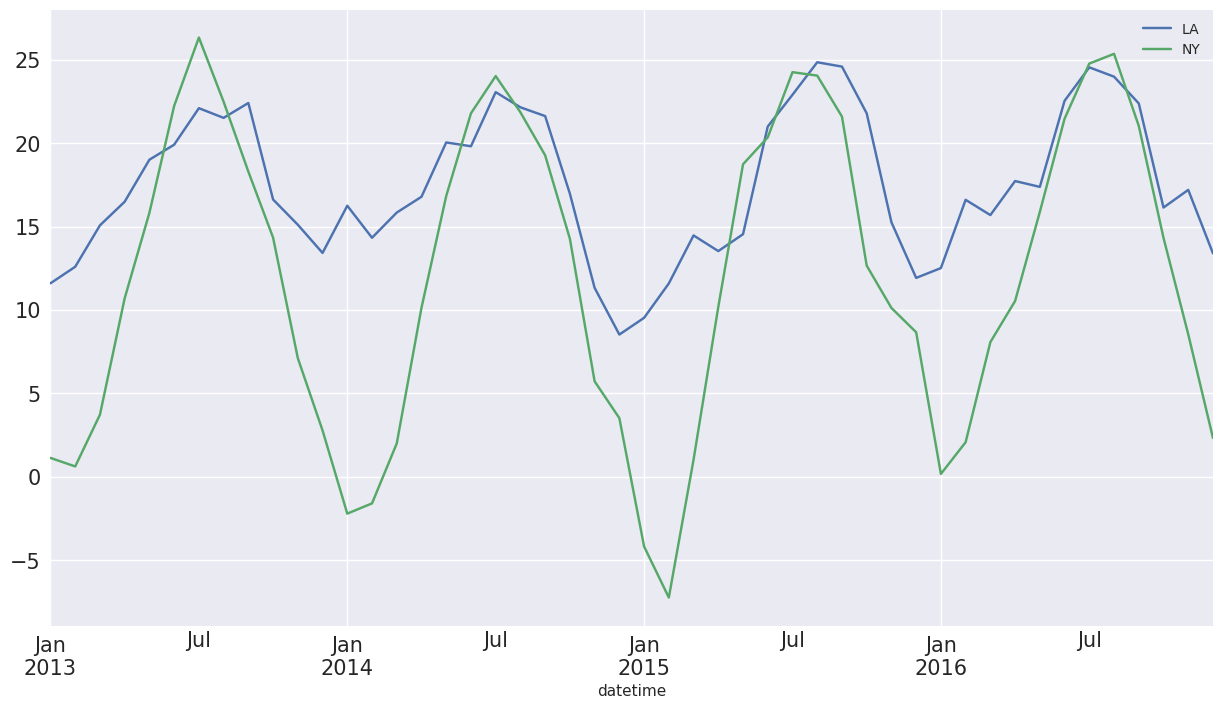

In [159]:
# Period Indexes can be useful for displaying info in a meaningful way
df_period.plot(figsize = (15, 8), fontsize = 15)
plt.show()

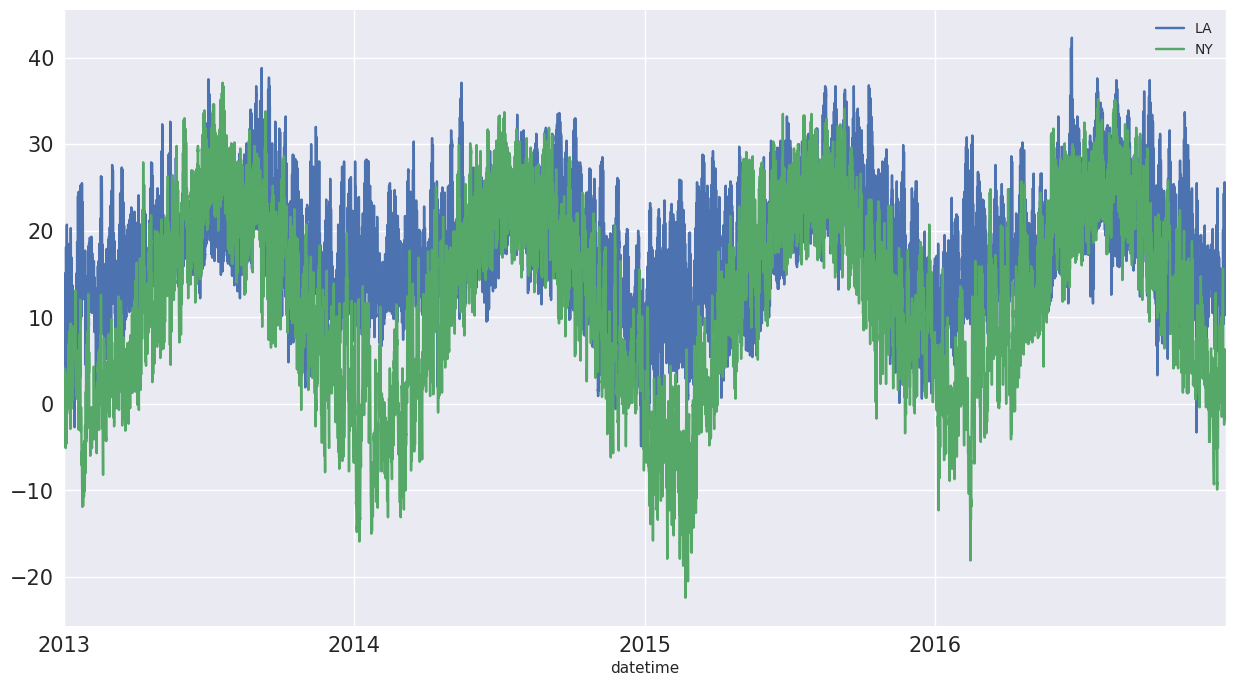

In [160]:
df.plot(figsize = (15, 8), fontsize = 15)
plt.show()